# Milestone 2
Familiarizing ourselves with the dataset.


In [1]:
import nbimporter
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import randomDataset
import numpy as np
import pandas as pd

from scipy.linalg import eigh, cholesky
from scipy.stats import norm
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'randomDataset'

In [3]:
# Fixing the dataset 
raceIndxs = {"Caucasian": 0, "African-American": 1, "Asian": 2, "Hispanic": 3, "Other": 4 }
sexIndxs = {"Male":0, "Female":1}
#### One-hotting the Dataset to handle non-numeric values ####
numPpl = 10000
# Generating the Covariance Matrix
features = ["Names", "GPA", "Avg Commute Time", "Cultural Fit", "Technical Aptitude", 
           "Soft Skills", "Employee Referral", "Years of Experience", "Leadership Capability", 
           "Race", "Sex", "Age", "Birth Origin", "Education", 
           "Undergraduate Degree", "Educational Prestige", "Sports", "Criminal Record",
           "Arrest Records", "LinkedIn Score", "Responsible Social Media Use", "HireVue Score"]

dataset = randomDataset.loadDataset(numPpl, features)
dataset_onehot = dataset.copy()
dataset_onehot = pd.get_dummies(dataset_onehot, columns=['Birth Origin', 'Sports'], prefix=['origin', 'sport'])

Loading the dataset .... this might take a few seconds!


In [4]:
dataset_onehot
dataset_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Names                         10000 non-null  object 
 1   GPA                           10000 non-null  float64
 2   Avg Commute Time              10000 non-null  float64
 3   Cultural Fit                  10000 non-null  int64  
 4   Technical Aptitude            10000 non-null  int64  
 5   Soft Skills                   10000 non-null  float64
 6   Employee Referral             10000 non-null  float64
 7   Years of Experience           10000 non-null  float64
 8   Leadership Capability         10000 non-null  float64
 9   Race                          10000 non-null  int64  
 10  Sex                           10000 non-null  int64  
 11  Age                           10000 non-null  float64
 12  Education                     10000 non-null  int64  
 13  Un

In [5]:
# Generating the Covariance Matrix
employeeData = pd.read_csv("employeeData.csv")

In [6]:
# To Correlate w/ Job Performance
dataset_onehot["Job Performance"] = employeeData["Job Performance"]
dataset_onehot["GPA"] = employeeData["GPA"]
dataset_onehot["Technical Aptitude"] = employeeData["Technical Aptitude"]
dataset_onehot["Leadership Capability"] = employeeData["Leadership Capability"]  
dataset_onehot["Soft Skills"] = employeeData["Soft Skills"]
dataset_onehot["Years of Experience"] = employeeData["Years of Experience"]

# To Correlate w/ Job Tenure 
dataset_onehot["Job Tenure"] = employeeData["Job Tenure"]
dataset_onehot["Military Tenure"] = employeeData["Military Tenure"]
dataset_onehot["Avg Commute Time"] = employeeData["Avg Commute Time"]

# Manually done correlated w/ job performance
dataset_onehot["Employee Referral"] = employeeData["Employee Referrals"]
dataset_onehot["Cultural Fit"] = employeeData["Cultural Fit"]
dataset_onehot["Education"] = employeeData["Education"]
dataset_onehot["Educational Prestige"] = employeeData["Educational Prestige"]

dataset_onehot["HireVue Score"] = employeeData["HireVue Score"]
dataset_onehot["Undergraduate Degree"] = employeeData["Degree"]
dataset_onehot["LinkedIn Score"] = employeeData["LinkedIn Score"]
dataset_onehot["Responsible Social Media Use"] = employeeData["Responsible Social Media Use"]
dataset_onehot["Criminal Record"] = employeeData["Criminal Record"]
dataset_onehot["Arrest Record"]= employeeData["Arrest Record"]


# How to correlate military Tenure w/ job performance...
# We give those with high military tenure higher job performance among blacks
# Correlate these features with other features

# Females
dataset_onehot["Sex"] = employeeData["Gender"]
dataset_onehot["Name"] = employeeData["Names"]
dataset_onehot["Race"] = employeeData["Race"]
# Age

# National Origin

# Race...

In [7]:
# Preprocess everything
### We also need to translate the Races back to their values then one-hot ###
indxToRaces = {value: key for key, value in raceIndxs.items()}
print(indxToRaces)
dataset_onehot = dataset_onehot.replace({"Race": indxToRaces})
race_col = dataset_onehot["Race"]
dataset_onehot = pd.get_dummies(dataset_onehot, columns = ['Race'], prefix=['race'])
dataset_onehot["Race"] = race_col

full_dataset = dataset_onehot.copy()
columnsTo1Hot = ['HireVue Score', 'Employee Referral', 'Cultural Fit', "Education", "Educational Prestige",
                "Undergraduate Degree", "LinkedIn Score", "Responsible Social Media Use", "Criminal Record", "Arrest Record"]
prefixes = ["hirevue", "referral", "culturalfit", "education", "prestige","degree", "linkedin", "socmedia", "criminal", "arrest"]
full_dataset = pd.get_dummies(full_dataset, columns=columnsTo1Hot, prefix=prefixes)

{0: 'Caucasian', 1: 'African-American', 2: 'Asian', 3: 'Hispanic', 4: 'Other'}


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [8]:
target_count = full_dataset['Job Performance'].value_counts(dropna = False)
print(target_count)
full_dataset.info()
full_dataset.to_csv("employeeData_big.csv")

-2    2736
 2    2625
 0    2428
 1    1144
-1    1067
Name: Job Performance, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Names                    10000 non-null  object 
 1   GPA                      10000 non-null  float64
 2   Avg Commute Time         10000 non-null  float64
 3   Technical Aptitude       10000 non-null  float64
 4   Soft Skills              10000 non-null  float64
 5   Years of Experience      10000 non-null  float64
 6   Leadership Capability    10000 non-null  float64
 7   Sex                      10000 non-null  float64
 8   Age                      10000 non-null  float64
 9   Arrest Records           10000 non-null  float64
 10  origin_Australia         10000 non-null  uint8  
 11  origin_Canada            10000 non-null  uint8  
 12  origin_China             10000 non-null 

In [3]:
full_dataset = pd.read_csv("employeeData_big.csv")


y = full_dataset["Job Performance"]
X = full_dataset.drop(["Job Performance"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

selectedFeatures = [
                    "culturalfit_0.0", "culturalfit_1.0", "culturalfit_2.0",
                    "referral_0.0", "referral_1.0",
                    "education_0.0", "education_1.0", "education_2.0",
                    "prestige_0.0", "prestige_1.0", "prestige_2.0",
                    "linkedin_None", "linkedin_Ok", "linkedin_Very Good",
                    "socmedia_Bad", "socmedia_Good", "criminal_0.0", "criminal_1.0",
                    "arrest_0.0", "arrest_1.0",
                    "GPA", "Technical Aptitude", "Soft Skills", "Leadership Capability",
                    ]
X_train_selectedFeatures = X_train[selectedFeatures].copy()
X_test_selectedFeatures = X_test[selectedFeatures].copy()

In [4]:
clf = OneVsRestClassifier(LogisticRegression(random_state = 0)).fit(X_train_selectedFeatures, y_train)

/Users/jonahwu/miniconda3/envs/cs231n/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jonahwu/miniconda3/envs/cs231n/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

In [5]:
print(clf.score(X_train_selectedFeatures, y_train))
# print(clf.score(X_test, y_test))
print(clf.classes_)
print(clf.coef_)

0.7817333333333333
[-2 -1  0  1  2]
[[ 2.54676396e-01 -1.13369051e-01 -1.41115648e-01  9.35166988e-02
  -9.33250010e-02  4.15399337e-01 -1.76335032e-01 -2.38872606e-01
   1.35343804e-01  5.97935549e-01 -1.17320914e-01  1.73248875e-01
   1.24867575e-01 -2.97924752e-01  1.36272867e-01 -1.36081169e-01
  -1.27920195e+00  1.27939365e+00 -1.27077847e+00  1.27097016e+00
   2.58513003e-01  5.15085775e-01 -8.27512586e+00 -5.39637004e+00]
 [ 2.35821699e-01  4.22002185e-01 -6.56235121e-01  2.63693947e-01
  -2.62105184e-01  3.84460175e-01  1.34372703e-01 -5.17244115e-01
  -1.88336310e-01 -2.06262428e-01  4.36410434e-02  5.03170174e-01
   8.34225113e-02 -5.85003922e-01  3.65086778e-01 -3.63498015e-01
   1.13133756e+00 -1.12974880e+00  8.32710622e-01 -8.31121859e-01
   1.84665255e-02  7.08785860e-03 -4.42360501e-01 -2.52229749e-01]
 [ 7.50543807e-01  5.02583365e-01 -1.25495370e+00  6.39324251e-01
  -6.41150777e-01 -2.07797340e-01  7.28575773e-02  1.33113237e-01
   7.89032177e-02 -9.23181169e-02  2.9

In [6]:
# Going to attach predictions to a copy of the original dataset for analysis
final_data = X_train.copy()
ytrain_predicted = clf.predict(X_train_selectedFeatures)
# print(X_train)

indxs = list(final_data.index)
print(len(indxs))
print(len(ytrain_predicted))

labels = [int(x) for x in ytrain_predicted]
final_data["Performance"] = labels
# print(final_data)
# final_data.to_csv("modeldata_results.csv")

7500
7500


Caucasian           912
African-American    527
Asian               392
Hispanic            155
Other                98
Name: Race, dtype: int64
392
1209
The selection rate for Caucasians:  0.3173277661795407
The selection rate for Asians:  0.3242349048800662
The selection rate for African-Americans:  0.2366412213740458
The selection rate for Hispanics:  0.21262002743484226


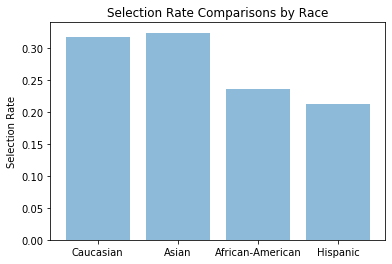

The selection rate for Males:  0.45085910652920963
The selection rate for Females:  0.03700159489633174


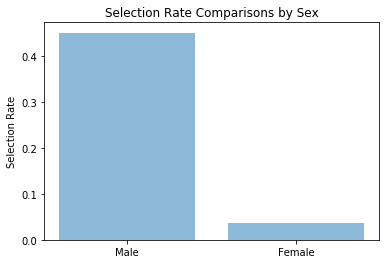

In [13]:
def graphSelectionRates(protectedType, data):
    raceIndxs = {"Caucasian": 0, "African-American": 1, "Asian": 2, "Hispanic": 3, "Other": 4 }
    sexIndxs = {"Male":0, "Female":1}
    if protectedType == "Race":
        selected = data[data["Performance"].isin([2])]
#         print(len(selected))
        numCandidates = data["Race"].value_counts()
        numQualified = selected["Race"].value_counts()
        print(numQualified)

        selectionRate1 = numQualified[raceIndxs["Caucasian"]] / numCandidates[raceIndxs["Caucasian"]]

        selectionRate2 = numQualified[raceIndxs["Asian"]] / numCandidates[raceIndxs["Asian"]]
        selectionRate3 = numQualified[raceIndxs["African-American"]] / numCandidates[raceIndxs["African-American"]]
        selectionRate4 = numQualified[raceIndxs["Hispanic"]] / numCandidates[raceIndxs["Hispanic"]]
        print("The selection rate for " + "Caucasian" + "s: ",selectionRate1)
        print("The selection rate for " + "Asian" + "s: ", selectionRate2)
        print("The selection rate for " + "African-American" + "s: ",selectionRate3)
        print("The selection rate for " + "Hispanic" + "s: ",selectionRate4)
        y_pos = np.arange(4)
        performance = [selectionRate1, selectionRate2, selectionRate3, selectionRate4]
        plt.bar(y_pos, performance, align='center', alpha=0.5)
        plt.xticks(y_pos, ("Caucasian", "Asian", "African-American", "Hispanic"))
        plt.ylabel('Selection Rate')
        plt.title('Selection Rate Comparisons by Race')
        plt.show()
    elif protectedType == "Sex":
        selected = data[data["Performance"].isin([2])]
#         print(len(selected))
        numCandidates = data["Sex"].value_counts()
        numQualified = selected["Sex"].value_counts()
        
        maleSelectionRate = numQualified[sexIndxs["Male"]] / numCandidates[sexIndxs["Male"]]
        femaleSelectionRate = numQualified[sexIndxs["Female"]] / numCandidates[sexIndxs["Female"]]
        print("The selection rate for " + "Male" + "s: ",maleSelectionRate)
        print("The selection rate for " + "Female" + "s: ",femaleSelectionRate)
        y_pos = np.arange(2)
        performance = [maleSelectionRate, femaleSelectionRate]
        plt.bar(y_pos, performance, align='center', alpha=0.5)
        plt.xticks(y_pos, ("Male", "Female"))
        plt.ylabel('Selection Rate')
        plt.title('Selection Rate Comparisons by Sex')
        plt.show()
    else:
        print("Try another protected type - Sex or Race")

        
graphSelectionRates("Race", final_data)
graphSelectionRates("Sex", final_data)


# Another Approach - k Nearest Neighbors:
Lets introduce one more model...
Wherein the last exercise we just looked at the nearest neighbors, we now evaluate the candidates by looking at the k closest different neighbors who all vote on what the candidate is!

In [14]:
y = full_dataset["Job Performance"]
X = full_dataset.drop(["Job Performance"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)


selectedFeatures = [
                    "culturalfit_0.0", "culturalfit_1.0", "culturalfit_2.0",
                    "referral_0.0", "referral_1.0",
                    "education_0.0", "education_1.0", "education_2.0",
                    "prestige_0.0", "prestige_1.0", "prestige_2.0",
                    "linkedin_None", "linkedin_Ok", "linkedin_Very Good",
                    "socmedia_Bad", "socmedia_Good", "criminal_0.0", "criminal_1.0",
                    "arrest_0.0", "arrest_1.0",
                    "GPA", "Technical Aptitude", "Soft Skills", "Leadership Capability",
                    ]

X_train_selectedFeatures = X_train[selectedFeatures].copy()
X_test_selectedFeatures = X_test[selectedFeatures].copy()
# Now they get access to a new dataset that has sort of different distributions, they don't know
# Task use kNearestNeighbor or LogisticRegression or something else to try and maximize...
def rescaling(X):
#     print(X)
    scaler = MinMaxScaler()
    scaler.fit(X)
    data = scaler.transform(X)
    return data

X_scaled_train = rescaling(X_train_selectedFeatures)
print(X_scaled_train)

neigh = KNeighborsClassifier(n_neighbors=4, metric="minkowski", p=3)
neigh.fit(X_scaled_train, y_train)
y_predict = neigh.predict(X_scaled_train)

neigh.score(X_scaled_train, y_train)

[[1.         0.         0.         ... 0.84404349 0.73260235 0.6101635 ]
 [1.         0.         0.         ... 0.22931629 0.20049447 0.17903986]
 [0.         0.         1.         ... 0.29457808 0.63753811 0.40230012]
 ...
 [1.         0.         0.         ... 0.40899472 0.52695063 0.46011545]
 [1.         0.         0.         ... 0.41695412 0.49834202 0.5173566 ]
 [0.         1.         0.         ... 0.32880873 0.31720392 0.43840963]]


0.8089333333333333

Caucasian           855
African-American    471
Asian               368
Hispanic            131
Other                85
Name: Race, dtype: int64
368
1209
The selection rate for Caucasians:  0.2974947807933194
The selection rate for Asians:  0.304383788254756
The selection rate for African-Americans:  0.21149528513695554
The selection rate for Hispanics:  0.17969821673525377


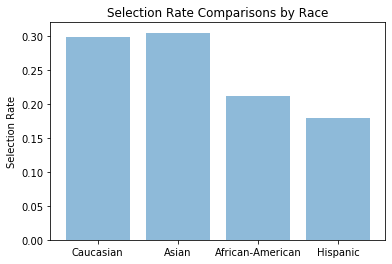

The selection rate for Males:  0.4142038946162658
The selection rate for Females:  0.03253588516746411


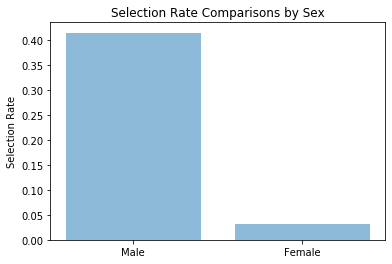

In [16]:
# Going to attach predictions to a copy of the original dataset for analysis
knn_final_data = X_train.copy()

# print(X_train)


labels = [int(x) for x in y_predict]
knn_final_data["Performance"] = labels
graphSelectionRates("Race", knn_final_data)
graphSelectionRates("Sex", knn_final_data)